In [1]:
import torch

import sys
sys.path.append('../')
from video_helper import VideoHelper

sys.path.append('../SRGAN/')
from srgan import Generator

# Load SRGAN model
UPSCALE_FACTOR = 4
srgan = Generator(UPSCALE_FACTOR).to('cpu')
srgan.load_state_dict(torch.load('../results/srgan/trained_models/srgan_netG-150-epochs.pth',  map_location=torch.device('cpu')))

video_helper = VideoHelper()

In [3]:
VIDEO = './videos/bee_on_a_flower_downsample_factor_20.mp4'
OUTPUT_VIDEO = './videos/bee_on_a_flower_srgan_factor_20.mp4'

orginal frame dimensions: frame_width = 96, frame_height = 54, fps = 29
upsampled frame dimensions: frame_width = 384, frame_height = 216, fps = 29


Processing Frames:   0%|          | 0/286 [00:00<?, ?frames/s]

original shape = (54, 96, 3)


/home/pedrovelozo/TCC-Pedro-Velozo-ENG1132/env/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


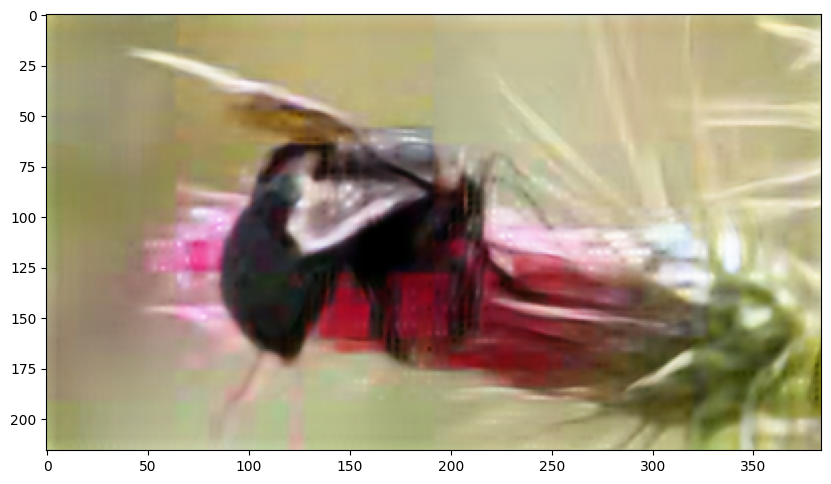

Processing Frames:   1%|          | 3/286 [00:00<00:44,  6.41frames/s]

<class 'numpy.ndarray'>
after model shape = (216, 384, 3)


Processing Frames: 100%|██████████| 286/286 [00:17<00:00, 16.15frames/s]

Video has been downsampled by a factor of 4 and saved as ./videos/bee_on_a_flower_srgan_factor_20.mp4


In [4]:
video_helper.apply_model_to_video_and_save(VIDEO, OUTPUT_VIDEO, srgan, UPSCALE_FACTOR)

In [5]:
video_helper.check_if_video_is_valid(OUTPUT_VIDEO)

frame_width = 384, frame_height = 216, fps = 29


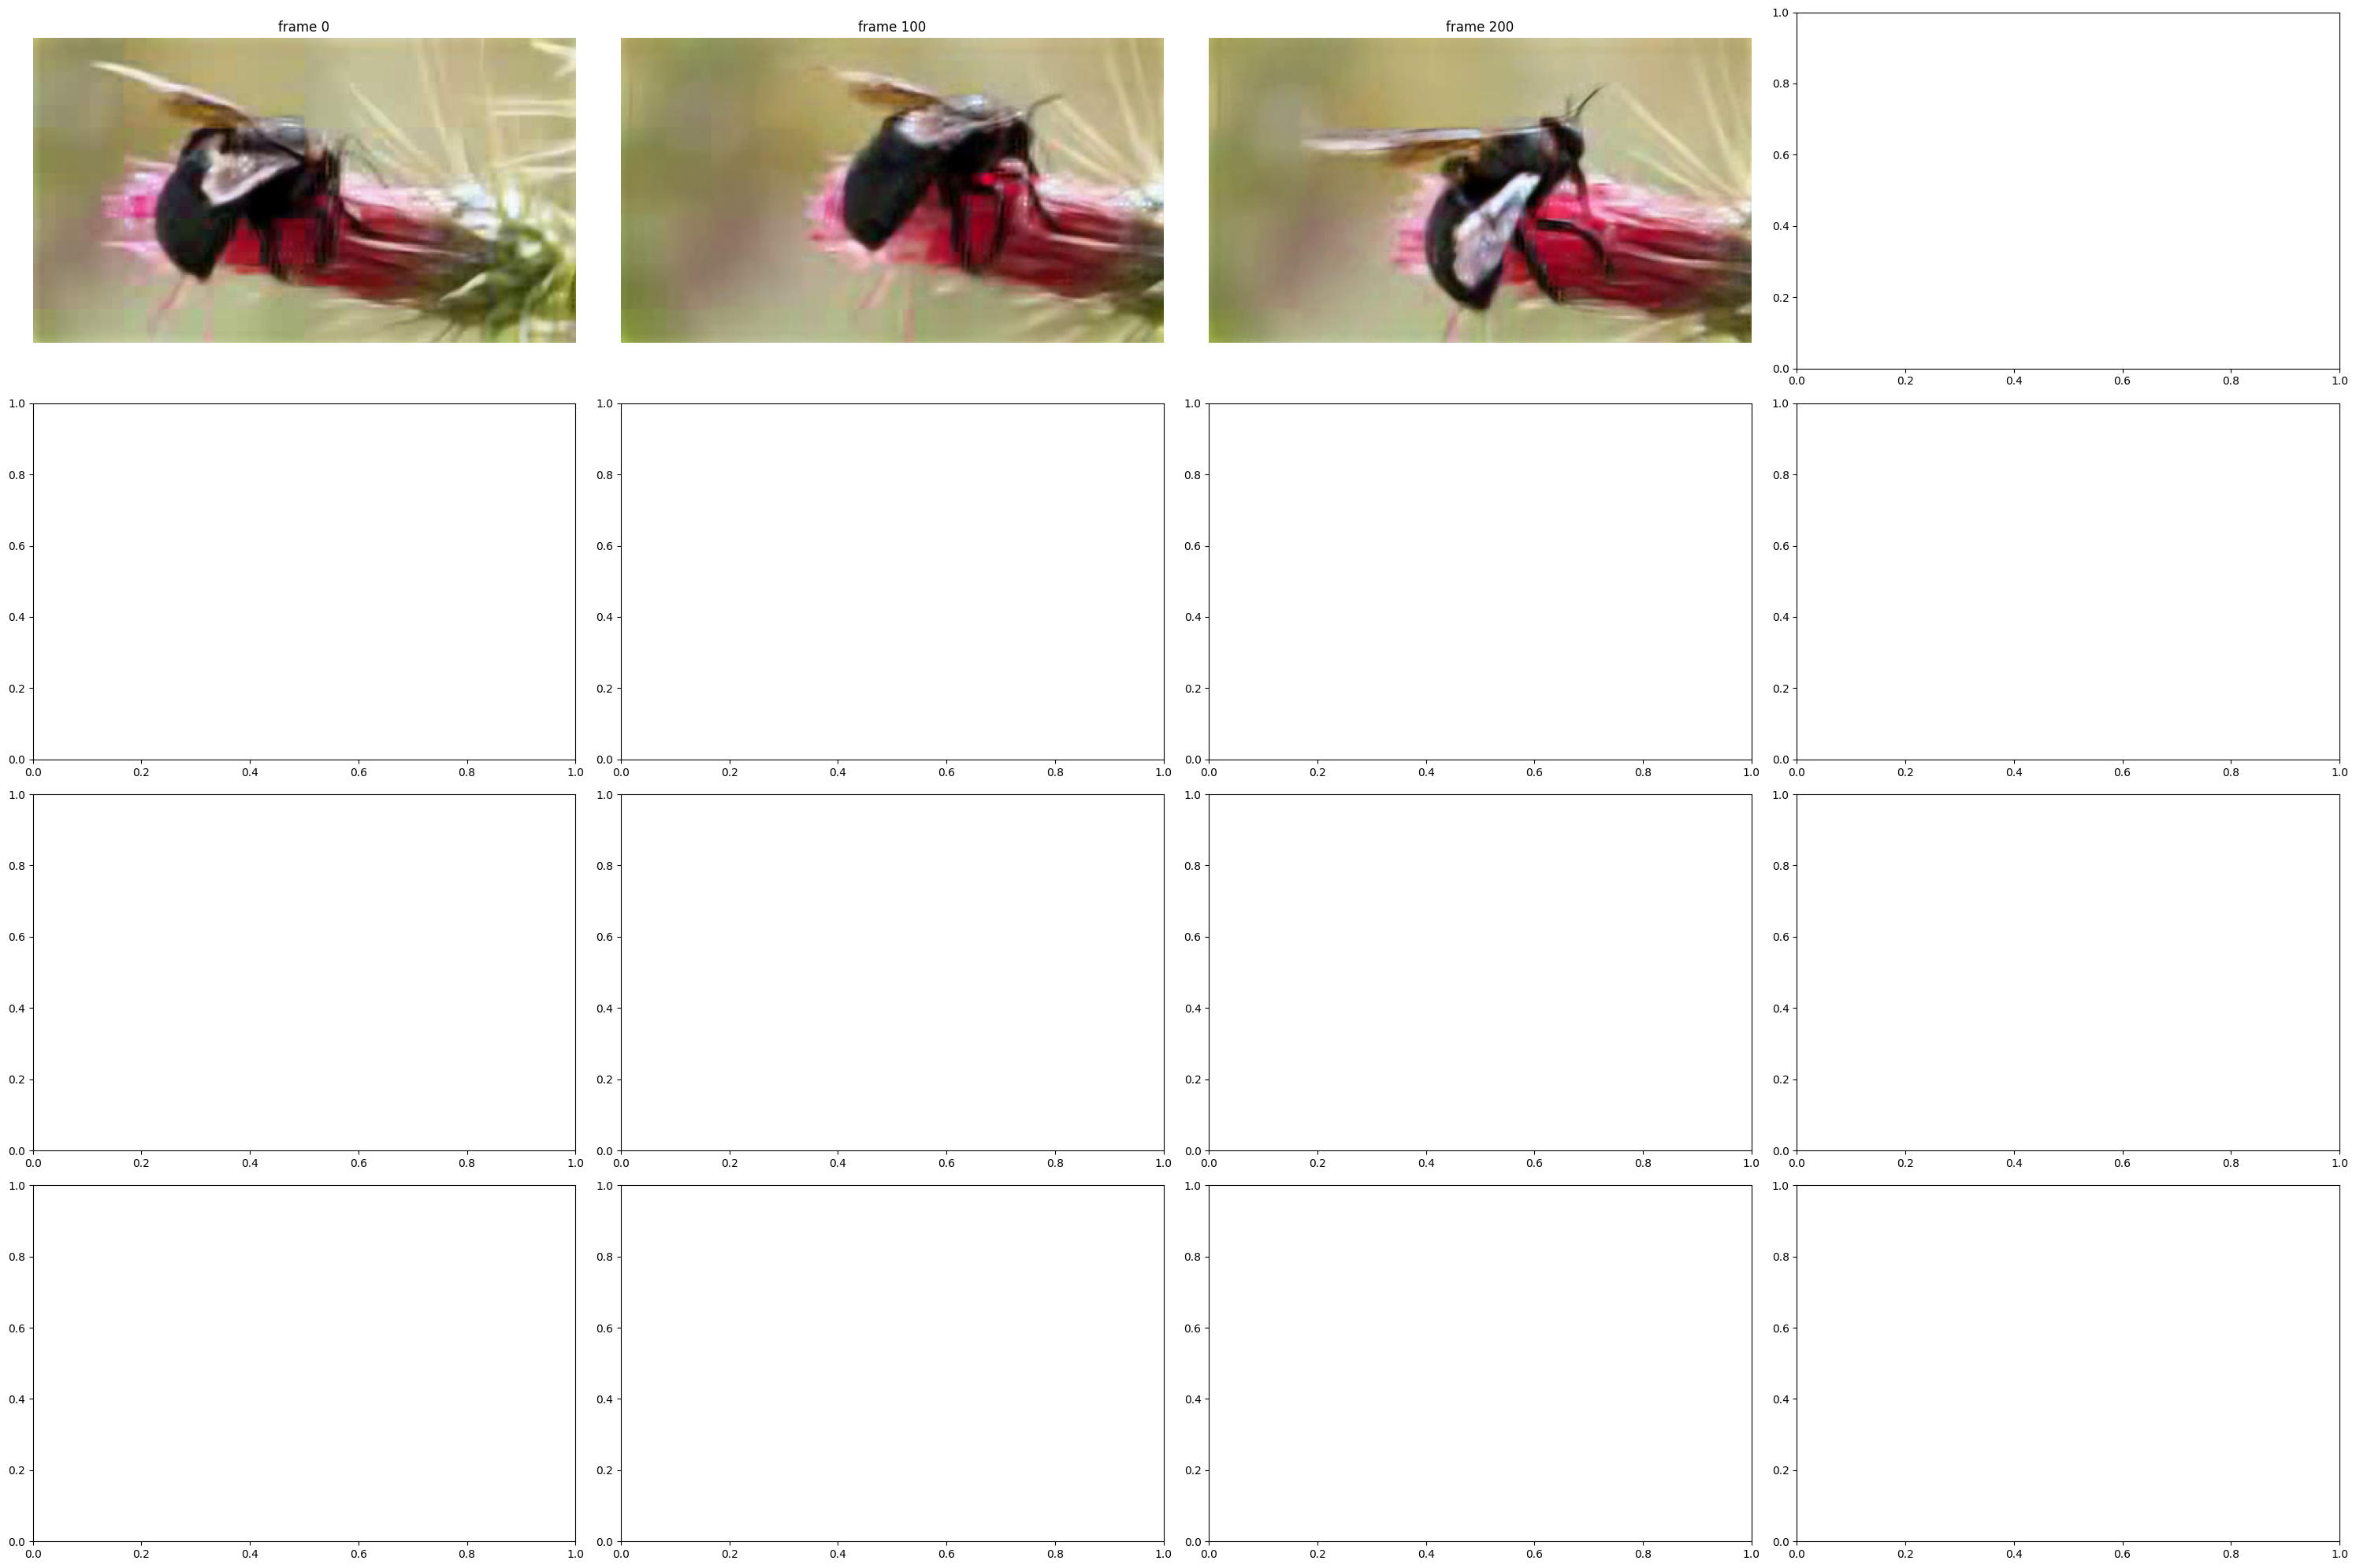

In [6]:
video_helper.plot_video_frames(OUTPUT_VIDEO)